In [2]:
# Import libraries

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
# Import Data
X_train= pd.read_csv('/Users/cuicuisong/Desktop/data/X_train_new.csv',  index_col=0)
X_test= pd.read_csv('/Users/cuicuisong/Desktop/data/X_test_new.csv',  index_col=0)
y_train= pd.read_csv('/Users/cuicuisong/Desktop/data/y_train_new.csv')
y_test= pd.read_csv('/Users/cuicuisong/Desktop/data/y_test_new.csv')
X_test.fillna(0,inplace=True)

In [6]:
# Baseline model

steps = [('rescale', StandardScaler()), 
         ('logreg', LogisticRegression(random_state=42,max_iter=10000))]
model = Pipeline(steps)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


y_train_proba= model.predict_proba(X_train)
y_test_proba= model.predict_proba(X_test)

y_train_score = y_train_proba[:, 1]
y_test_score = y_test_proba [:, 1]

PR-AUC is 0.95


Text(0.5, 1.0, 'Precision-Recall Curve of Train')

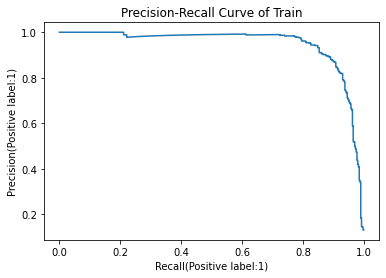

In [7]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

# Data to plot precision - recall curve
precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recalltrain = auc(recall_train, precision_train)
print('PR-AUC is {:.2f}'.format(auc_precision_recalltrain))

# plot PR curve
plt.plot(recall_train, precision_train)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Train')

PR-AUC is 0.83


Text(0.5, 1.0, 'Precision-Recall Curve of Test ')

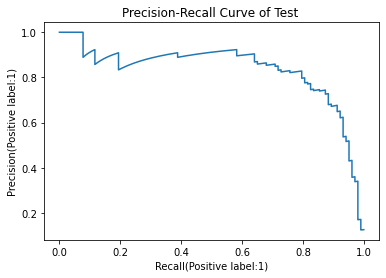

In [8]:
# test

# Data to plot precision - recall curve
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_test_score)
auc_precision_recall_test = auc(recall_test, precision_test)
print('PR-AUC is {:.2f}'.format(auc_precision_recall_test))

# plot PR curve
plt.plot(recall_test, precision_test)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve of Test ')